![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [52]:
# Importing pandas and matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [53]:
Netfilx_shows=pd.read_csv('netflix_data.csv')
Netfilx_shows

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


In [54]:
Netfilx_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [55]:
Movies=Netfilx_shows[Netfilx_shows['type']=='Movie']
Movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [56]:
Netflix_Movies=Movies[['title','country','genre','release_year','duration']]
Netflix_Movies

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
7781,Zoom,United States,Children,2006,88
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


In [57]:
short_movies=Netflix_Movies[Netflix_Movies['duration']<60]
short_movies

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
7679,WWII: Report from the Aleutians,United States,Documentaries,1943,45
7692,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
7718,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54
7771,Zion,United States,Documentaries,2018,12


,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
7679,WWII: Report from the Aleutians,United States,Documentaries,1943,45
7692,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
7718,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54
7771,Zion,United States,Documentaries,2018,12


We can note that most short movies are documentation movies , children movies and stand up movies 

In [59]:
Netflix_Movies[['genre']]

,genre
1,Dramas
2,Horror Movies
3,Action
4,Dramas
6,Horror Movies
...,...
7781,Children
7782,Dramas
7783,Dramas
7784,Documentaries


In [60]:
Movies_genre=Netflix_Movies['genre'].value_counts()
Movies_genre.index

Index(['Dramas', 'Comedies', 'Documentaries', 'Action', 'Children', 'Stand-Up',
       'Horror Movies', 'International Movies', 'Classic Movies',
       'Uncategorized', 'Thrillers', 'Independent Movies', 'Anime Features',
       'Music', 'Cult Movies', 'Sci-Fi', 'Romantic Movies', 'Sports Movies',
       'LGBTQ Movies'],
      dtype='object')

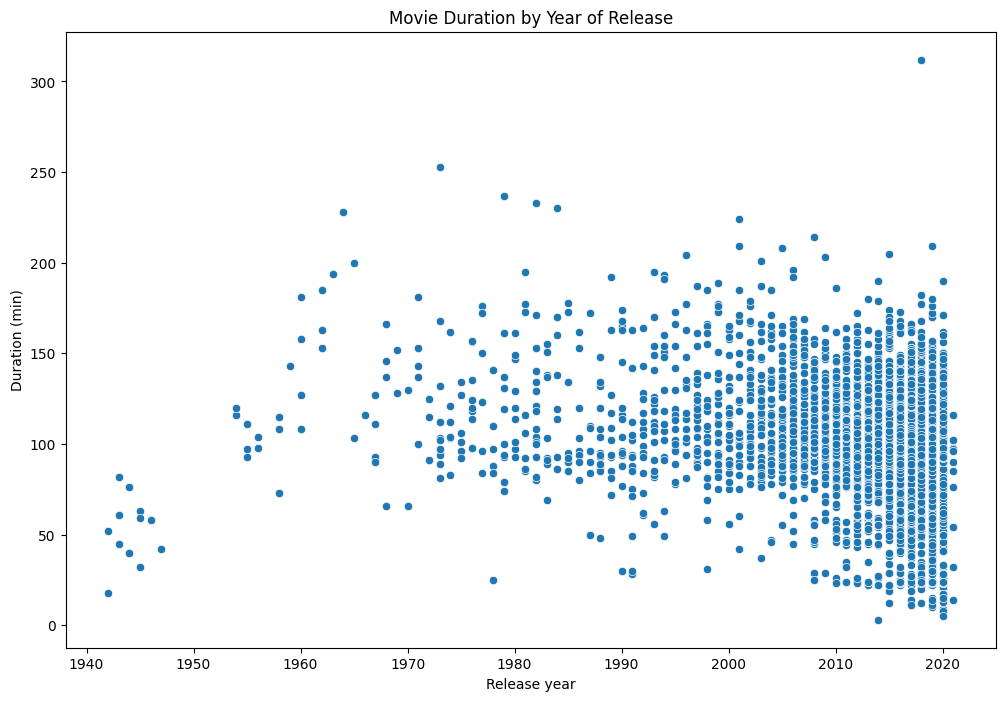

In [61]:
# Create a figure object with specified dimensions
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=Netflix_Movies , x='release_year' , y='duration' )
# Set labels and title
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

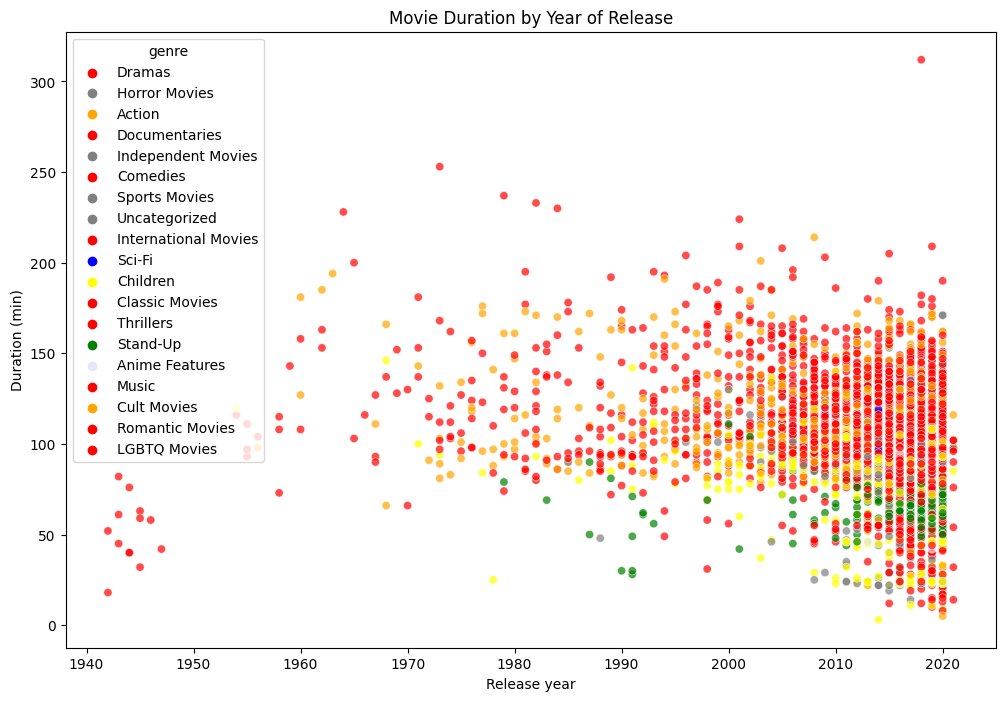

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define the genre-color mapping dictionary
genre_colors = {
    'Dramas': 'red',
    'Comedies': 'green',
    'Documentaries': 'blue',
    'Action': 'orange',
    'Children': 'purple',
    'Stand-Up': 'pink',
    'Horror Movies': 'gray',
    'International Movies': 'brown',
    'Classic Movies': 'cyan',
    'Uncategorized': 'magenta',
    'Thrillers': 'lime',
    'Independent Movies': 'yellow',
    'Anime Features': 'darkblue',
    'Music': 'darkgreen',
    'Cult Movies': 'darkorange',
    'Sci-Fi': 'darkred',
    'Romantic Movies': 'darkpurple',
    'Sports Movies': 'lavender',
    'LGBTQ Movies': 'peach'
}

# Create a palette from the genre-color mapping dictionary
palette = [genre_colors[genre] for genre in Netflix_Movies['genre']]

# Create a figure object with specified dimensions
fig = plt.figure(figsize=(12, 8))

# Scatter plot with different colors based on genre
sns.scatterplot(
    data=Netflix_Movies,
    x='release_year',
    y='duration',
    hue='genre',
    palette=palette,
    marker='o',  # Use circular markers
    alpha=0.7   # Adjust transparency for better visualization
)

# Set labels and title
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()


maybe the movies are getting shorter